In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'      'Internship-Aug2020-Gowtham R.pdf'   Photos
'Getting started.pdf'  'My Drive'			   'Pongal 2021'


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project

/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project


In [8]:
import pandas as pd
import numpy as np 
from os.path import join
from myFunctions.candle_stick_plot import plotCandleStick
from myFunctions.list_data_dir import load_data_files
from myFunctions import dataConversion 
from myFunctions.predictionPlot import prediction_plot
from sklearn.model_selection import train_test_split
from keras.layers import Dense,LSTM,SimpleRNN
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import RandomizedSearchCV,KFold

In [4]:
fields = ['Date','High','Low','Open','Close']
lookback = 30
datafolder = r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50"
prediction_date = pd.Timestamp(2020,11,30,00,00,00)

In [5]:
df = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50/ADANIPORTS.csv",usecols = fields)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close
0,2007-11-27,770.00,1050.00,770.0,962.90
1,2007-11-28,984.00,990.00,874.0,893.90
2,2007-11-29,909.00,914.75,841.0,884.20
3,2007-11-30,890.00,958.00,890.0,921.55
4,2007-12-03,939.75,995.00,922.0,969.30


In [6]:
High_X , High_y = dataConversion.convert2matrix(df['High'],lookback)

In [18]:
High_X.shape

(3190, 30)

In [19]:
High_X = High_X.reshape(3190,30,1)

In [20]:
High_X_train, High_X_test , High_y_train , High_y_test = train_test_split(High_X,High_y,test_size=0.2)

In [21]:
High_X_train.shape

(2552, 30, 1)

In [54]:
model = Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(lookback,1)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer = 'adam' , metrics = ['mae'])

In [55]:
history = model.fit(High_X_train,High_y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 11ms/step - loss: 41711.9191 - mae: 157.6320 - val_loss: 1157.2954 - val_mae: 11.4184
Epoch 2/100
64/64 [==============================] - 0s 7ms/step - loss: 276.5156 - mae: 9.4565 - val_loss: 1306.3534 - val_mae: 11.6058
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 301.2770 - mae: 10.1189 - val_loss: 1129.3903 - val_mae: 8.8833
Epoch 4/100
64/64 [==============================] - 0s 7ms/step - loss: 286.4083 - mae: 8.6977 - val_loss: 1121.7894 - val_mae: 8.4025
Epoch 5/100
64/64 [==============================] - 0s 7ms/step - loss: 145.4200 - mae: 7.3934 - val_loss: 1134.8602 - val_mae: 10.8064
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 208.4141 - mae: 7.6646 - val_loss: 1130.3798 - val_mae: 8.0408
Epoch 7/100
64/64 [==============================] - 0s 7ms/step - loss: 183.5833 - mae: 7.6607 - val_loss: 1132.3844 - val_mae: 8.0288
Epoch 8/100
64/64 [====================

In [36]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()

In [37]:
model.evaluate(High_X_test,High_y_test)

20/20 [==============================] - 0s 2ms/step - loss: 143.9301 - mae: 6.7573


[143.9300994873047, 6.757256984710693]

In [38]:
from sklearn.metrics import r2_score

In [56]:
y_predict = model.predict(High_X_test)

In [57]:
r2_score(High_y_test,y_predict)

0.9951616445203026

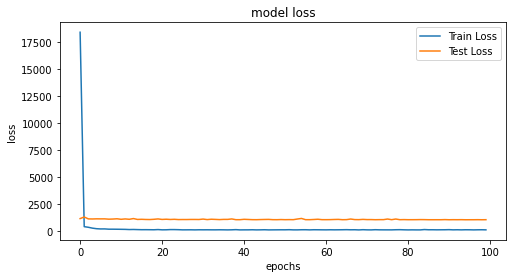

In [58]:
model_loss(history)

In [42]:
import matplotlib.pyplot as plt


In [64]:
def create_model(layers=1 ,neurons=25):
    model1=Sequential()

    model1.add(SimpleRNN(50,activation='relu',input_shape=(lookback,1)))

    for i in range(layers):
      model1.add(Dense(neurons,activation='relu'))
    model1.add(Dense(1,activation='relu'))
    model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
    return model1

In [65]:
model = KerasRegressor(build_fn=create_model,epochs=100,batch_size=16)
params = dict(layers=[0,1,2,3,4],neurons=[5,10,15,20,25])
random_search = RandomizedSearchCV(model,params,cv=KFold(3))
random_search.fit(High_X_train,High_y_train)

Streaming output truncated to the last 5000 lines.
Epoch 13/100
107/107 [==============================] - 1s 7ms/step - loss: 405.4823 - mse: 405.4823
Epoch 14/100
107/107 [==============================] - 1s 7ms/step - loss: 189.1660 - mse: 189.1660
Epoch 15/100
107/107 [==============================] - 1s 7ms/step - loss: 3161.3747 - mse: 3161.3747
Epoch 16/100
107/107 [==============================] - 1s 7ms/step - loss: 577.9670 - mse: 577.9670
Epoch 17/100
107/107 [==============================] - 1s 7ms/step - loss: 325.0337 - mse: 325.0337
Epoch 18/100
107/107 [==============================] - 1s 6ms/step - loss: 652.5640 - mse: 652.5640
Epoch 19/100
107/107 [==============================] - 1s 6ms/step - loss: 617.4830 - mse: 617.4830
Epoch 20/100
107/107 [==============================] - 1s 6ms/step - loss: 279.0529 - mse: 279.0529
Epoch 21/100
107/107 [==============================] - 1s 7ms/step - loss: 422.6567 - mse: 422.6567
Epoch 22/100
107/107 [================

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0966c80890>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'layers': [0, 1, 2, 3, 4],
                                        'neurons': [5, 10, 15, 20, 25]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [66]:
RNN_model = random_search.best_estimator_

In [67]:
random_search.best_score_

-328.65511322021484

In [70]:
RNN_model.model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_52 (SimpleRNN)    (None, 50)                2600      
_________________________________________________________________
dense_129 (Dense)            (None, 15)                765       
_________________________________________________________________
dense_130 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 16        
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_predict = RNN_model.model.predict(High_X_test)

In [72]:
r2_score(High_y_test,y_predict)

-3.414370582539001

In [73]:
RNN_model.model.save("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_rnn_model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_rnn_model/assets
